In [1]:
import sys
sys.path.append('/Users/philipperhardt/Library/CloudStorage/GoogleDrive-perhardt70@gmail.com/My Drive/Uni/b) Semester/7.Semester - WS24:25/Bachelorarbeit - The massless and massive spinor-helicity formalism/Code BA/')

from spinor_helicity import *
from sympy import *
init_printing()

# Setup

In [2]:
# Spherical coordinates for all spin-spinors
E1, E2, E3, E4, P1, P2, P3, P4, theta1, theta2, theta3, theta4, phi1, phi2, phi3, phi4 = symbols('E1:5, P1:5, theta1:5, phi1:5', real=True, positive=True)

# For hiding square roots
r1p, r2p, r3p, r4p, r1m, r2m, r3m, r4m = symbols('r^+_1:5, r^-_1:5', real=True, positive=True)

# For kinematics
En, P, theta, phi = symbols('E, P, theta, phi', real=True, positive=True)
r12p, r12m, r34p, r34m = symbols('r_{12}^+, r_{12}^-, r_{34}^+, r_{34}^-', real=True, positive=True) # r12p = sqrt(En+P), r34p = sqrt(-En-P)

# For end result
e, m, s = symbols('e, m, s', real=True, positive=True)
t, u = symbols('t, u', real=True, negative=True)

# 4-momenta in spherical coordinates
p = Matrix([En, P, theta, phi])
p1 = Matrix([E1, P1, theta1, phi1])
p2 = Matrix([E2, P2, theta2, phi2])
p3 = Matrix([E3, P3, theta3, phi3])
p4 = Matrix([E4, P4, theta4, phi4])

# Substitutions
hide_square_roots = {    
    sqrt(E1+P1): r1p,
    sqrt(E1-P1): r1m,
    
    sqrt(E2+P2): r2p,
    sqrt(E2-P2): r2m,
    
    sqrt(E3+P3): r3p,
    sqrt(E3-P3): r3m,
    
    sqrt(E4+P4): r4p,
    sqrt(E4-P4): r4m,
}

insert_square_roots = {
    r1p: sqrt(E1+P1),
    r1m: sqrt(E1-P1),
    
    r2p: sqrt(E2+P2),
    r2m: sqrt(E2-P2),
    
    r3p: sqrt(E3+P3),
    r3m: sqrt(E3-P3),
    
    r4p: sqrt(E4+P4),
    r4m: sqrt(E4-P4),
}

kinematics = {
    E1: En, P1: P, theta1: 0, phi1: 0,
    E2: En, P2: P, theta2: pi, phi2:0,
    E3: -En, P3: -P, theta3: theta, phi3:0,
    E4: -En, P4: -P, theta4: pi-theta, phi4: pi,
}

kinematics_square_roots_hidden = {
    r1p: r12p, r1m: r12m, theta1: 0, phi1: 0,
    r2p: r12p, r2m: r12m, theta2: pi, phi2: 0,
    r3p: r34p, r3m: r34m, theta3: theta, phi3:0,
    r4p: r34p, r4m: r34m, theta4: pi-theta, phi4: pi,
}

# Calculation

In [3]:
# Spin-spinors with hidden square roots and inserted kinematics
ss1 = [spinor.subs(hide_square_roots).subs(kinematics_square_roots_hidden) for spinor in SpinSpinors(p1)]
ss2 = [spinor.subs(hide_square_roots).subs(kinematics_square_roots_hidden) for spinor in SpinSpinors(p2)]
ss3 = [spinor.subs(hide_square_roots).subs(kinematics_square_roots_hidden) for spinor in SpinSpinors(p3)]
ss4 = [spinor.subs(hide_square_roots).subs(kinematics_square_roots_hidden) for spinor in SpinSpinors(p4)]

# Calculating the tensor of rank 4 containing all helicity amplitudes
M1_t = -TensorProd(SpinSquareProd(ss1, ss2), SpinAngleProd(ss3, ss4)) - TensorProd(SpinAngleProd(ss1, ss2), SpinSquareProd(ss3, ss4)) # arrange in index order I_1, I_2, I_3, I_4
M2_t = TensorProd(SpinSquareProd(ss1, ss4), SpinAngleProd(ss2, ss3)) + TensorProd(SpinAngleProd(ss1, ss4), SpinSquareProd(ss2, ss3))  # arrange in index order I_1, I_4, I_2, I_3
M_t = tensor.array.MutableDenseNDimArray.zeros(2,2,2,2)

for a in range(2):
    for b in range(2):
        for c in range(2):
            for d in range(2):
                M_t[a,b,c,d] = 2*e**2/t*(M1_t[a,b,c,d] + M2_t[a,d,b,c]).simplify()
                
M1_u = TensorProd(SpinSquareProd(ss1, ss2), SpinAngleProd(ss3, ss4)) + TensorProd(SpinAngleProd(ss1, ss2), SpinSquareProd(ss3, ss4))  # arrange in index order I_1, I_2, I_3, I_4
M2_u = TensorProd(SpinSquareProd(ss1, ss3), SpinAngleProd(ss2, ss4)) + TensorProd(SpinAngleProd(ss1, ss3), SpinSquareProd(ss2, ss4))  # arrange in index order I_1, I_3, I_2, I_4
M_u = tensor.array.MutableDenseNDimArray.zeros(2,2,2,2)

for a in range(2):
    for b in range(2):
        for c in range(2):
            for d in range(2):
                M_u[a,b,c,d] = 2*e**2/u*(M1_u[a,b,c,d] + M2_u[a,c,b,d]).simplify()
                
M = M_t - M_u

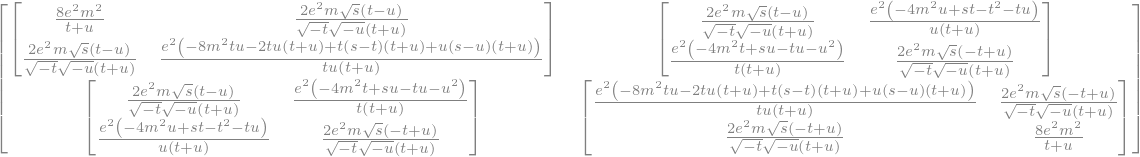

In [4]:
# Replacing everything through Mandelstam variables
replacements = {
    En**2 - P**2: m**2,
    P**2: -(t+u)/4,
    En**2: s/4,
    sin(theta): 2*sqrt(t*u)/(t+u),
    cos(theta): (u-t)/(u+t),
    sin(theta/2)**2: t/(t+u),
    cos(theta/2)**2: u/(t+u),
}

M_final = M.applyfunc(lambda elem: elem.subs({
    r12p*r12m: m,
    r34p*r34m: m,
}).subs({
    r12p**2: En+P,
    r12m**2: En-P,
    r34p**2: -(En+P),
    r34m**2: -(En-P),
}).expand().simplify().subs(replacements).expand().subs({
    s+t+u: 4*m**2,
}).simplify().collect(m))

M_final

# Verification: calculation of unpolarized amplitude squared

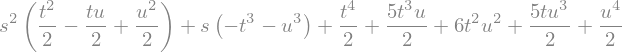

In [5]:
# Calculating the unpolarized amplitude squared times 4 <-> ignoring the factor of 1/4, otherwise SymPy doesn't simplify cleanly
result4 = 0
for a in range(2):
    for b in range(2):
        for c in range(2):
            for d in range(2):
                result4 = result4 + M_final[a,b,c,d]*M_final[a,b,c,d].conjugate()

# Facilitating comparision with literature result
result4 = result4.simplify()
num = result4*(t**2*u**2)/(8*e**4)
num.subs({4*m**2: s+t+u}).expand().simplify().collect(s)

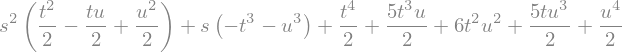

In [6]:
nachtmann_result = 4*e**4/(t**2*u**2) * ((s-2*m**2)**2*(t**2 + u**2) + u*t*(-4*m**2*s + 12*m**4 + u*t))
nachtmann_num = 4*nachtmann_result*(t**2*u**2)/(8*e**4)
nachtmann_num.subs({m**2: (s+t+u)/4}).expand().simplify().collect(s)